# Analisis de las emisiones de globales de CO2 de 2002-2022

Primero importamos librerias para el proyecto

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Analisis preliminar de los datos

In [43]:
df = pd.read_csv('./data/GCB2022v27_MtCO2_flat.csv')

Validamos la cantidad de variables que tiene nuestro conjunto de datos

In [44]:
df.shape

(63104, 11)

In [45]:
df_copy = df.copy()

In [46]:
#Ordenar tabla por emisiones totales
df_sorted = df.sort_values('Total',ascending=False)

In [47]:
filter = df['Country'] == 'Global'
df_global = df[filter]
df_sorted.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63103,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63096,Global,WLD,2014,35577.534774,15051.512770,11678.782147,6654.555376,1499.912273,387.901908,304.870299,4.847727


Eliminamos globales

In [48]:
filter = df['Country']=='Global'
df.drop(df[filter].index,inplace=True)

In [49]:
df_sorted = df.sort_values('Total',ascending=False)
df_sorted

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10879,China,CHN,2021,11472.369171,7955.985419,1713.339980,773.866062,852.961348,4.677478,171.538883,8.045741
10878,China,CHN,2020,10956.213369,7605.716883,1627.725238,687.880944,858.232613,5.118808,171.538883,7.688950
10877,China,CHN,2019,10740.996069,7543.157408,1559.728160,630.171360,826.876048,3.806248,177.256846,7.554165
10876,China,CHN,2018,10353.876989,7316.399776,1500.473952,575.368912,786.744610,3.350856,171.538883,7.306542
10875,China,CHN,2017,10011.107108,7163.317856,1430.586816,486.359360,758.185168,2.924697,169.733211,7.098687
...,...,...,...,...,...,...,...,...,...,...,...
62755,International Transport,XIT,1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62756,International Transport,XIT,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62757,International Transport,XIT,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62758,International Transport,XIT,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.shape

(62832, 11)

Nuestro conjunto de datos tiene un total de 10 variables y 62832 observaciones, vamos a validar las variables y como se distribuyen

In [52]:
(df.dtypes.value_counts())

float64    8
object     2
int64      1
dtype: int64

Tenemos 8 categorias numericas y dos cualitativas y 9 cuantitativas ahora validemos la cantidad de nulos

In [53]:
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41282
Gas                   41354
Cement                42160
Flaring               41354
Other                 61244
Per Capita            44130
dtype: int64

Vemos que tiene una gran cantidad de nulos , sobre los 40000 por variable, esto es un poco raro, asi que validemos mas a profunidad el dataframe y veamos la cantidad de nulos por variable de forma visual ya que esto puede ser un problema

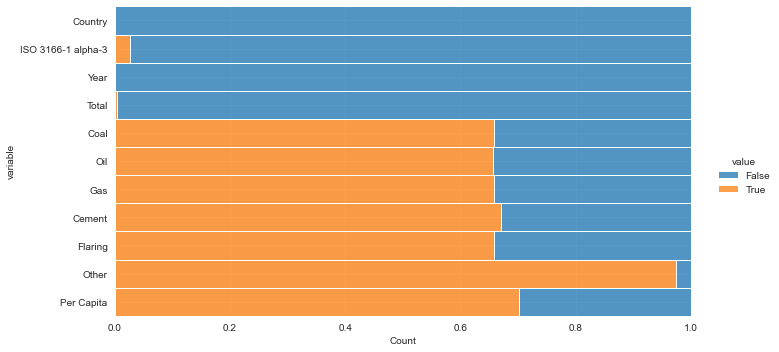

In [54]:
(
    df.
    isnull().
    melt().
    pipe(
        lambda df:(
            sns.displot(data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2
        )
    )
 )
)

In [55]:
filtro = df['ISO 3166-1 alpha-3'].isna() == True
df = df[~filtro]
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Validemos los estadisticos basicos para entender aun mas nuestro dataframe

In [56]:
df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,61200.000000,61000.000000,21388.000000,21466.000000,21394.000000,20588.000000,21394.000000,1588.000000,18270.000000
mean,1885.500000,28.465806,37.599977,28.183670,11.875190,2.188931,0.861338,6.098367,4.556790
std,78.519747,258.198273,246.104813,144.226670,75.316530,21.635671,4.446181,18.355981,17.748022
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.087936,0.000000,0.000000,0.000000,0.503605,0.232535
50%,1885.500000,0.000000,0.253157,1.028784,0.000000,0.021950,0.000000,1.200529,1.400733
75%,1953.250000,0.591792,6.229716,8.046447,0.499835,0.557698,0.000000,4.181465,5.302582
max,2021.000000,11472.369171,7955.985419,2644.236598,1673.999100,858.232613,88.383147,177.256846,834.192642


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61200 entries, 0 to 62831
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             61200 non-null  object 
 1   ISO 3166-1 alpha-3  61200 non-null  object 
 2   Year                61200 non-null  int64  
 3   Total               61000 non-null  float64
 4   Coal                21388 non-null  float64
 5   Oil                 21466 non-null  float64
 6   Gas                 21394 non-null  float64
 7   Cement              20588 non-null  float64
 8   Flaring             21394 non-null  float64
 9   Other               1588 non-null   float64
 10  Per Capita          18270 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.6+ MB


Validando si se tiene NaN

In [58]:
df.isna().any()

Country               False
ISO 3166-1 alpha-3    False
Year                  False
Total                  True
Coal                   True
Oil                    True
Gas                    True
Cement                 True
Flaring                True
Other                  True
Per Capita             True
dtype: bool

Llenamos con 0 los NA

In [59]:
df.fillna(0,inplace=True)

Vaidamos nuevamente

In [60]:
df.isna().any()

Country               False
ISO 3166-1 alpha-3    False
Year                  False
Total                 False
Coal                  False
Oil                   False
Gas                   False
Cement                False
Flaring               False
Other                 False
Per Capita            False
dtype: bool

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61200 entries, 0 to 62831
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             61200 non-null  object 
 1   ISO 3166-1 alpha-3  61200 non-null  object 
 2   Year                61200 non-null  int64  
 3   Total               61200 non-null  float64
 4   Coal                61200 non-null  float64
 5   Oil                 61200 non-null  float64
 6   Gas                 61200 non-null  float64
 7   Cement              61200 non-null  float64
 8   Flaring             61200 non-null  float64
 9   Other               61200 non-null  float64
 10  Per Capita          61200 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.6+ MB


EDA Variables categoricas

In [62]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (11, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

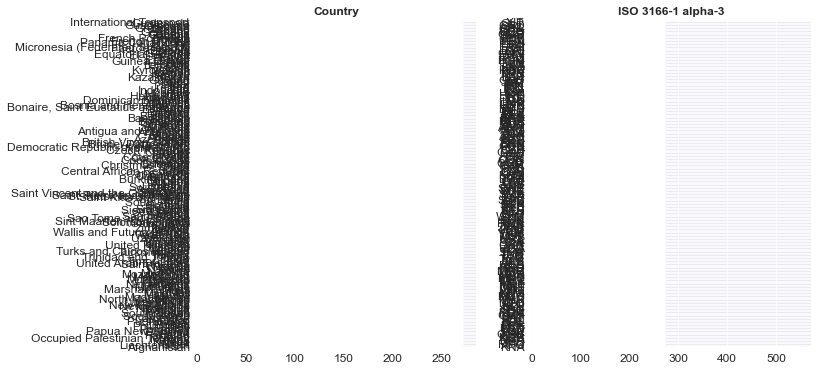

In [63]:
graficos_eda_categoricos(df.select_dtypes('O'))

La parte categorica no nos indica nada, ya que la base de datos es un resumen por fecha, es decir la frecuencia corresponde a la cantidad de veces que sale el pais o el codigo del pais segun la cantidad de fechas resumida.

EDA Variables numericas

In [64]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [65]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Year,61200.0,1885.500000,1885.5,78.519747,1750.0,1817.75,1885.5,1953.250000,2021.000000
Total,61200.0,28.372781,0.0,257.781148,0.0,0.00,0.0,0.579693,11472.369171
Coal,61200.0,13.140332,0.0,146.587014,0.0,0.00,0.0,0.000000,7955.985419
Oil,61200.0,9.885468,0.0,86.468317,0.0,0.00,0.0,0.146560,2644.236598
Gas,61200.0,4.151272,0.0,44.888721,0.0,0.00,0.0,0.000000,1673.999100
Cement,61200.0,0.736368,0.0,12.591132,0.0,0.00,0.0,0.000000,858.232613
Flaring,61200.0,0.301102,0.0,2.660651,0.0,0.00,0.0,0.000000,88.383147
Other,61200.0,0.158239,0.0,3.110866,0.0,0.00,0.0,0.000000,177.256846
Per Capita,61200.0,1.360336,0.0,9.918627,0.0,0.00,0.0,0.095514,834.192642


## I. Preguntas de negocio

¿Cual es el pais que mas genera emisiones?

In [66]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

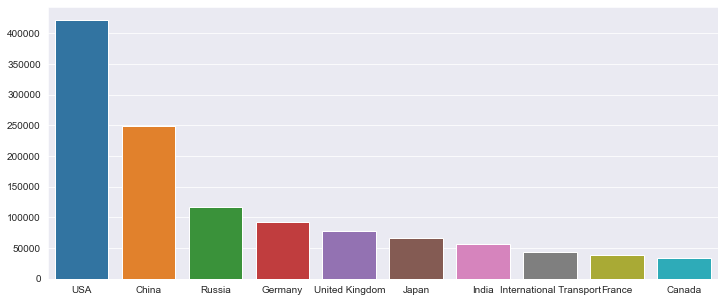

In [67]:
#De los valores ordenaros generamos listas para responder las preguntas de negocio


countries = list(df.groupby('Country').sum(numeric_only=True).sort_values(by='Total',ascending=False).index)
values = list(df.groupby('Country').sum(numeric_only=True).sort_values(by='Total',ascending=False)['Total'])

plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.barplot(x=countries[:10],y=values[:10])
plt.show()

El pais que genera mas emisiones es USA, seguido por China y Russia

¿Como se distribuyen las emisiones, rango, moda, media y mediana?

In [68]:
df_country = df.groupby('Country').sum(numeric_only=True).sort_values('Total',ascending=False)
df_country.drop('Year',inplace=True,axis=1)
df_country.describe()


,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,7717.396344,3574.170304,2688.847365,1129.145872,200.292037,81.899845,43.040921,370.011334
std,35029.260921,18494.073416,11972.175718,5864.065089,1093.856693,276.946951,343.034669,896.203448
min,0.153888,0.000000,0.153888,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.606676,0.000000,31.109542,0.000000,0.000000,0.000000,0.000000,33.583861
50%,293.838988,10.590412,192.086831,1.819155,16.600183,0.023707,0.000000,137.774659
75%,2804.101751,541.646679,1412.684432,319.975403,79.928769,17.334650,0.000000,428.137030
max,421906.855203,187073.411887,161275.027109,78542.543572,15657.812105,2421.252825,4899.551490,11574.339869


<AxesSubplot:xlabel='Total'>

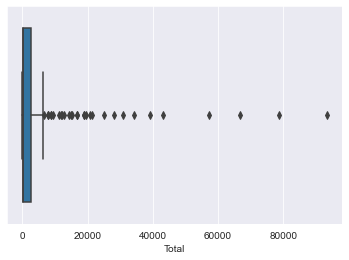

In [69]:
sns.boxplot(
    data=df_country[3:],
    x='Total'
)

De un total de 231 paises, tenemos un minimo de emisiones de  0.15 , una mediana de 274 y un maximo de 421.906 indicando que nuestros datos se encuentran muy sesgados eliminaremos los datos altos para evidenciar como se mueven los descriptivos

Realizamos un zoom en Colombia

<AxesSubplot:xlabel='Year', ylabel='Total'>

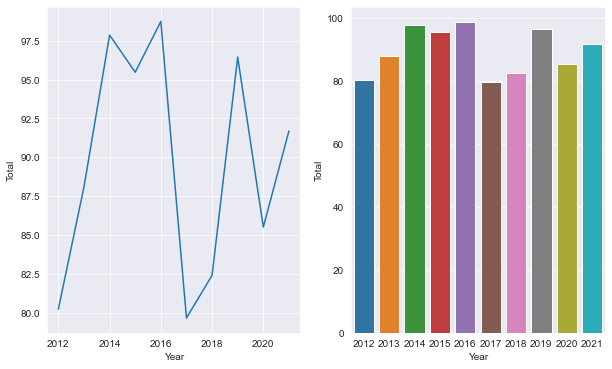

In [70]:
filter = df['Country']=='Colombia'
colombia_data =df[filter]

#Filtramos por ultimos 10 años en colombia
colombia_data = colombia_data[-10:]

plt.figure(figsize=(10,6))
plt.subplot(121)
sns.lineplot(data=colombia_data,x='Year',y='Total')
plt.subplot(122)
sns.barplot(data=colombia_data,x='Year',y='Total')


La caida de emisiones del 2020 puede tratarse por efectos del covid-19

Ahora validamos el comportamiento por tipo de emision

In [71]:
columns = ['Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other']
plt.figure(figsize=(12,5))
fig = px.line(y=colombia_data['Total'],x=colombia_data['Year'],labels={'x':'Year','y':'Emissions'})
for i in columns:
    fig.add_scatter(y=colombia_data[str(i)],x=colombia_data['Year'],name=str(i))
fig.show()

<Figure size 864x360 with 0 Axes>

Han bajado las emisiones de carbon para en el 2020, asi como tambien han aumentado las emisiones por quema de aceites, el gas se ha mantenido

#Vaidamos la correlaccion entre emisiones en general para nuestro dataframe

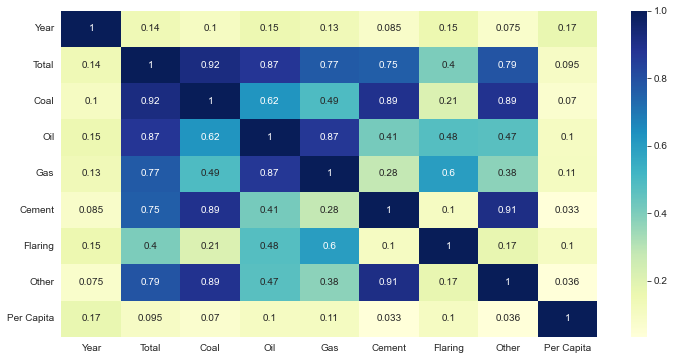

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.yticks(rotation='horizontal')
plt.show()

Text(0.5, 1.0, 'Colombia')

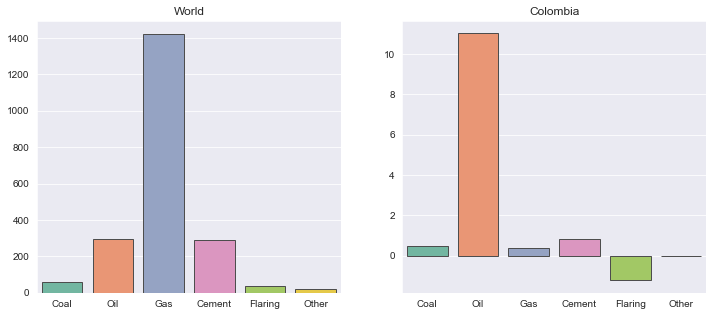

In [73]:
#Contrastamos valores de Colombia contra los datos globales
plt.figure(figsize=(12,5))
world_data_past_10 = df_global[-10:]
values_world = []
for i in columns:
    values_world.append(world_data_past_10.iloc[9][str(i)]-world_data_past_10.iloc[0][str(i)])
values_colombia = []
for i in columns:
    values_colombia.append(colombia_data.iloc[9][str(i)]-colombia_data.iloc[0][str(i)])
plt.subplot(121)
sns.barplot(x=columns,y=values_world,palette='Set2',edgecolor='.3')
plt.title('World')
plt.subplot(122)
sns.barplot(x=columns,y=values_colombia,palette='Set2',edgecolor='.3')    
plt.title('Colombia')

La mayor cantidad de emisiones del mundo entero en los ultimos 10 años es el gas, seguido del aceite y el cemento

In [74]:
afg = df[df['ISO 3166-1 alpha-3']=='AFG']
#lets analyse the data of AFG over pas 30 years which has been continously affected by war
afg_past_30 = afg[-30:]

Text(0.5, 1.0, 'Afghanistan emission trend of past 30 years')

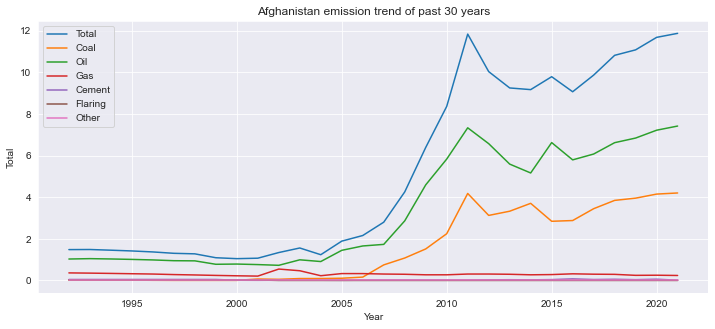

In [75]:
columns = ['Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other']
cols = ['Total']+columns
plt.figure(figsize=(12,5))
sns.lineplot(x=afg_past_30['Year'],y=afg_past_30['Total'])
for i in columns:
    sns.lineplot(x=afg_past_30['Year'],y=afg_past_30[str(i)])
plt.legend(cols)
plt.title('Afghanistan emission trend of past 30 years')

Ahora miremos de los ultimos 10 años los paises con mas emisiones


In [92]:
filtro = df['Year']>=2013
df_ultimos_10 = df[filtro]

In [93]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

<AxesSubplot:xlabel='Total', ylabel='Per Capita'>

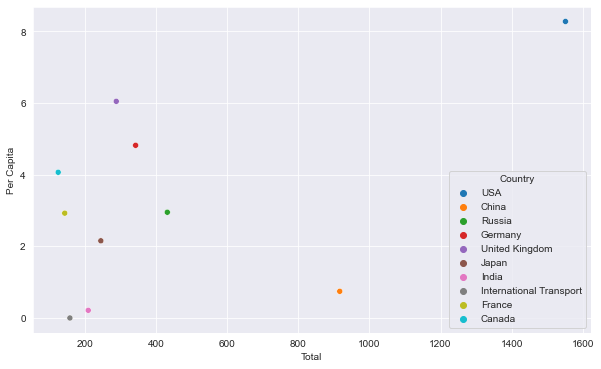

In [99]:
plt.figure(figsize=(10,6))
avg_emissions = df.groupby('Country').mean().sort_values(by='Total',ascending=False)[:10].reset_index()
sns.scatterplot(data=avg_emissions,x='Total',y='Per Capita',hue='Country')

In [100]:
avg_emissions.head()

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,USA,1885.5,1551.128144,645.018345,592.922894,288.759351,10.278789,8.901665,5.247101,8.279769
1,China,1885.5,916.738300,687.769897,126.807144,26.330924,57.565486,0.251792,18.013057,0.743979
2,Russia,1885.5,432.160410,167.542181,122.131684,128.875788,6.099904,5.464880,2.045973,2.952237
3,Germany,1885.5,342.979793,237.742070,72.987919,26.386977,4.436054,0.344022,1.082752,4.821263
4,United Kingdom,1885.5,288.635000,209.009549,49.800111,26.408941,1.924804,1.067848,0.423747,6.049744


Cual es el pais con mas emisiones por categoria de emision?

In [108]:
for i in columns:
    print('Categoria -->'+str(i))
    avg_data = df.groupby('Country').mean().sort_values(by='Total',ascending=False)[:10].reset_index()
    countries = avg_data['Country'].values[:5]
    for j in countries:
        print(j)

Categoria -->Coal
USA
China
Russia
Germany
United Kingdom
Categoria -->Oil
USA
China
Russia
Germany
United Kingdom
Categoria -->Gas
USA
China
Russia
Germany
United Kingdom
Categoria -->Cement
USA
China
Russia
Germany
United Kingdom
Categoria -->Flaring
USA
China
Russia
Germany
United Kingdom
Categoria -->Other
USA
China
Russia
Germany
United Kingdom
